# Retruns is the Sp500

pip install yfinance

In [2]:
# Importing necessary libraries for data manipulation and analysis
import yfinance as yf 
import numpy as np

In [3]:
# Loading the historical stock price data from a file
df = yf.download("TSLA",start="2010-01-01") #we can also change the stock and the dates for ex "APPL",start="2018-01-01"
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-04-02,164.750000,167.690002,163.429993,166.630005,166.630005,116650600
2024-04-03,164.020004,168.820007,163.279999,168.380005,168.380005,82950100
2024-04-04,170.070007,177.190002,168.009995,171.110001,171.110001,123162000


In [4]:
# Data preprocessing and analysis
df["returns"]= np.log(df.Close.pct_change()+1) #the returns portion is creating a new column
#then we arew getting the logarithm for the Close column and the percent change for Close

In [5]:
# Data preprocessing and analysis
def lagit(df,lags):  #lags prior days we want to calculate 
    names = []
    for i in range(1,lags+1):
        df["Lag_"+str(i)] = df["returns"].shift(i) #creating a new columns Lag_ as a column
        names.append("Lag_"+str(i))
    return names
    

In [6]:
# Data preprocessing and analysis
lagnames = lagit(df,5)#the days we are lagging 
lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']

In [7]:
# Data preprocessing and analysis
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.002515,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.081723,-0.002515,NaN,NaN,NaN,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.134312,-0.081723,-0.002515,NaN,NaN,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.175470,-0.134312,-0.081723,-0.002515,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-02,164.750000,167.690002,163.429993,166.630005,166.630005,116650600,-0.050267,-0.003248,-0.022722,0.012084,0.028777,0.010482
2024-04-03,164.020004,168.820007,163.279999,168.380005,168.380005,82950100,0.010448,-0.050267,-0.003248,-0.022722,0.012084,0.028777
2024-04-04,170.070007,177.190002,168.009995,171.110001,171.110001,123162000,0.016083,0.010448,-0.050267,-0.003248,-0.022722,0.012084


In [8]:
# Data preprocessing and analysis
df.dropna(inplace = True)

In [9]:
# Importing necessary libraries for data manipulation and analysis
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[lagnames],df["returns"]) #dependent variable returns, lagnames independent 

LinearRegression()

In [10]:
# Using the model to make predictions on unseen data
df["prediction_LR"] = model.predict(df[lagnames])#again creating a new columns for our predictions

In [11]:
# Using the model to make predictions on unseen data
df["Direction_LR"] = [1 if i > 0 else -1 for i in df.prediction_LR]#creating a new column to buy or sell asset 

In [12]:
# Data preprocessing and analysis
df["strat_LR"] = df["Direction_LR"]* df["returns"]

In [13]:
# Data preprocessing and analysis
np.exp(df[["returns","strat_LR"]].sum())

returns     164.221560
strat_LR    130.561415
dtype: float64

<Axes: xlabel='Date'>

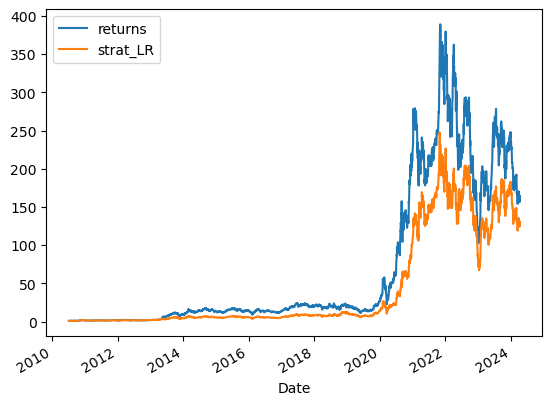

In [14]:
# Plotting the data to visualize trends and patterns
np.exp(df[["returns","strat_LR"]].cumsum()).plot() #cumsum will give us a timeseries 
#this is case of overfitting becasue we have not split the data but will do in the next step

# Spliitng the Dataset this time 

In [15]:
# Importing necessary libraries for data manipulation and analysis
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,shuffle = False,
                             test_size =0.3,random_state = 0) 
#using shuffle so it does not shuffle the predicted to the previous data

In [16]:
# Data preprocessing and analysis
model = LinearRegression()

In [17]:
# Building and training the machine learning model
model.fit(train[lagnames],train["returns"])#lagnames the features and dependent returns

LinearRegression()

In [18]:
# Using the model to make predictions on unseen data
test["prediction_LR"] = model.predict(test[lagnames])

In [19]:
# Using the model to make predictions on unseen data
test["Direction_LR"]= [1 if i>0 else -1 for i in test.prediction_LR]

In [20]:
# Data preprocessing and analysis
test["strat_LR"] = test["Direction_LR"]* test["returns"]

In [21]:
# Data preprocessing and analysis
np.exp(test[["returns","strat_LR"]].sum())#exp is exponential because we are using logs

returns     2.884891
strat_LR    0.574892
dtype: float64

In [22]:
# Data preprocessing and analysis
(test["Direction_LR"].diff()!=0).value_counts() #how many trades to make to get the performance strat_LR

Direction_LR
False    903
True     136
Name: count, dtype: int64

<Axes: xlabel='Date'>

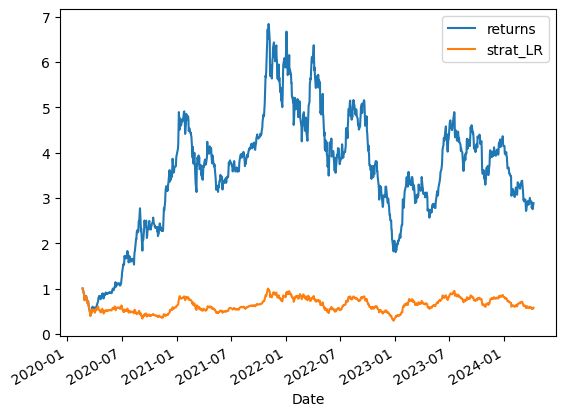

In [23]:
# Plotting the data to visualize trends and patterns
np.exp(test[["returns","strat_LR"]].cumsum()).plot()